#Oren_Berkovich_208750281

#1.1. Select the 2 features which allow for the most accurate 2-feature GNB classifier. Explain your  selection. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import io

np.seterr(all='raise')
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['penguins.csv']))
print(df)

Saving penguins.csv to penguins.csv
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male

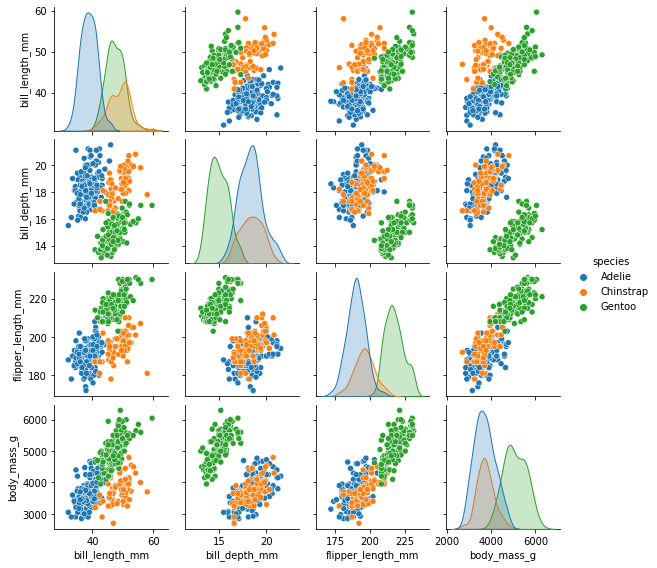

In [2]:
sns.pairplot(df, hue='species', height=2);
# bill_length_mm and bill_depth_mm bring the best classification

#The species feature got the most values that can be predicted.

#1.2. Train your model using 80% of the data set as your training set. 

In [7]:
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
import pydotplus

df = df.dropna()
x = df.drop(['species','island','sex','flipper_length_mm','body_mass_g'], axis=1)
y = df['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

model = GaussianNB()                      
model = model.fit(Xtrain, ytrain)         
y_model = model.predict(Xtest) 

metrics.accuracy_score(ytest, y_model)

          

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted

0.9253731343283582


,index,bill_length_mm,bill_depth_mm,index,species,prediction
0,65,41.6,18.0,65,Adelie,Adelie
1,276,43.8,13.9,276,Gentoo,Gentoo
2,186,49.7,18.6,186,Chinstrap,Chinstrap
3,198,50.1,17.9,198,Chinstrap,Chinstrap
4,293,46.5,14.8,293,Gentoo,Gentoo
...,...,...,...,...,...,...
62,255,48.4,16.3,255,Gentoo,Gentoo
63,138,37.0,16.5,138,Adelie,Adelie
64,86,36.3,19.5,86,Adelie,Adelie
65,79,42.1,19.1,79,Adelie,Adelie


#1.3. Use a filled contour plot to show the decision distribution of your model (limit your plot axes to  the actual data boundaries +-1). 

In [8]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'inferno'

    col1 = df.columns[0]
    col2 = df.columns[1]

    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)

    prob = len(clf.classes_) == 2

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_

    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

pd.concat([x,y],axis=1)

,bill_length_mm,bill_depth_mm,species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
4,36.7,19.3,Adelie
5,39.3,20.6,Adelie
...,...,...,...
338,47.2,13.7,Gentoo
340,46.8,14.3,Gentoo
341,50.4,15.7,Gentoo
342,45.2,14.8,Gentoo


#1.4. Overlay a scatter plot containing only the points from the original data set that would have had  incorrect predictions given this model above the filled contour plot.

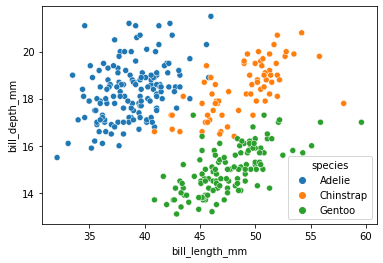

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        28
   Chinstrap       0.80      0.94      0.86        17
      Gentoo       0.95      0.86      0.90        22

    accuracy                           0.93        67
   macro avg       0.92      0.92      0.92        67
weighted avg       0.93      0.93      0.93        67



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


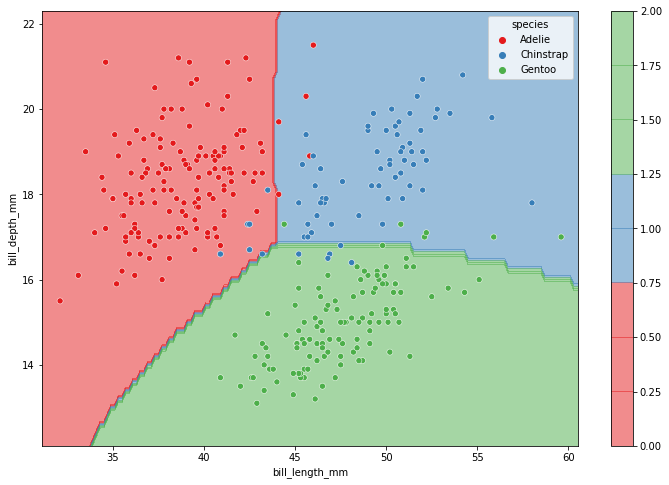

In [9]:
bayes_plot(pd.concat([x,y],axis=1),spread=1)

#1.5. Include the classification report for your model with regards to the test set.

In [10]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        28
   Chinstrap       0.80      0.94      0.86        17
      Gentoo       0.95      0.86      0.90        22

    accuracy                           0.93        67
   macro avg       0.92      0.92      0.92        67
weighted avg       0.93      0.93      0.93        67



#2.1. Create a new column named “class” in the data set which is a combination of the “sex” and  “species” category, e.g. Male Adelie, Female Chinstrap, etc…

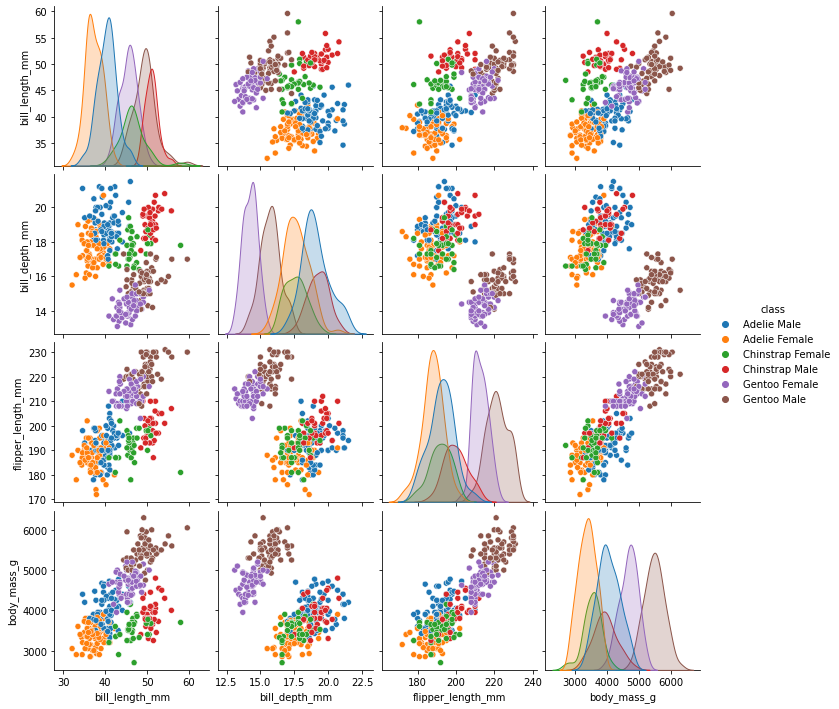

In [12]:
df['class'] = df['species'] + " " + df['sex']
sns.pairplot(df, hue="class")

#2.2. Repeat task 1 using “class” as your target class. 

0.8507462686567164


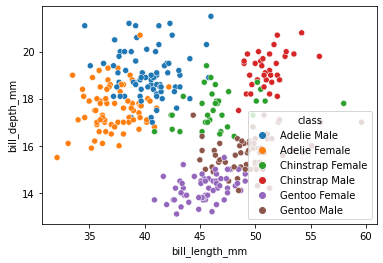

                  precision    recall  f1-score   support

   Adelie Female       0.90      0.90      0.90        10
     Adelie Male       0.94      0.94      0.94        18
Chinstrap Female       0.50      0.71      0.59         7
  Chinstrap Male       0.88      0.70      0.78        10
   Gentoo Female       1.00      0.93      0.96        14
     Gentoo Male       0.75      0.75      0.75         8

        accuracy                           0.85        67
       macro avg       0.83      0.82      0.82        67
    weighted avg       0.87      0.85      0.86        67



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


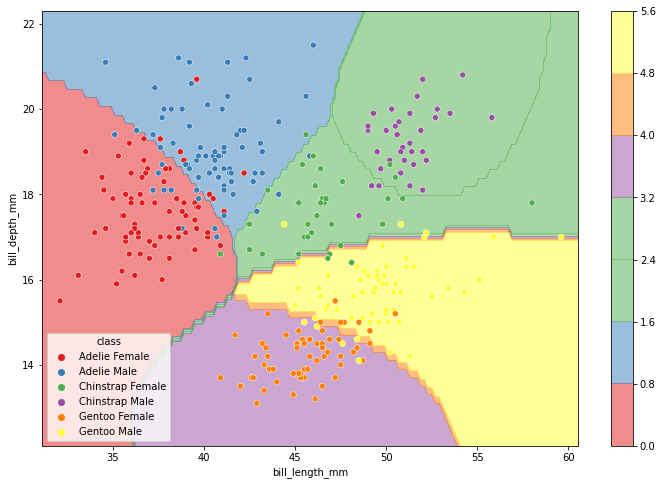

                  precision    recall  f1-score   support

   Adelie Female       0.90      0.90      0.90        10
     Adelie Male       0.94      0.94      0.94        18
Chinstrap Female       0.50      0.71      0.59         7
  Chinstrap Male       0.88      0.70      0.78        10
   Gentoo Female       1.00      0.93      0.96        14
     Gentoo Male       0.75      0.75      0.75         8

        accuracy                           0.85        67
       macro avg       0.83      0.82      0.82        67
    weighted avg       0.87      0.85      0.86        67



In [13]:
X = df.drop(['species','island','flipper_length_mm','body_mass_g','sex','class'], axis=1)
y = df['class']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

metrics.accuracy_score(ytest, y_model)

model = GaussianNB()             
model = model.fit(Xtrain, ytrain)         
y_model = model.predict(Xtest)  

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted
bayes_plot(pd.concat([x,y],axis=1),spread=1)

print(metrics.classification_report(ytest, ypred))